# Исследовательский анализ рынка заведений в Москве
Инвесторы из фонда Shut Up and Take My Money хотят открыть заведение общественного питания в Москве. Заказчики не знают, что это будет за место: кафе, ресторан или бар. Расположение, меню и цены пока тоже обсуждаются. Заказчики просят провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

### Цели и задачи проекта

Цель: исследовать рынок заведений в Москв
Задачи:
1) Ознакомление с данными

2) Предобработка данных

3) Исследовательский анализ данных

4) Итоговый вывод и рекомендации

### Описание данных
Датасет rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

Даьасет rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
    и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


## Загрузка данных и знакомство с ними

Загрузим библиотеки и датасеты rest_info и rest_price. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: rest_info и rest_price.

In [6]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

Выгружаем данные в переменные rest_info и rest_price

In [8]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета:

In [10]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [11]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет rest_info содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях.

После первичного анализа датасета можно сделать следующие выводы:
- Названия столбцов приведены к единому типу.
- Представленные данные имеют данные типа object ('id', 'name', 'category', 'address', 'district', 'hours'), int64 ('chain'), так как данные показывают является ли заведение сетевым и содержит значения 1 или 0, а также float64 ('rating', 'seats').
- Пропуски присутствуют в столбах 'hours' и 'seats'.

Познакомимся с данными датасета rest_price:

In [15]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [16]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет rest_price содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

Для первичного анализа датасета можно сделать следующие выводы:
- Названия столбцов приведены к единому типу, snake case.
- Данные содержат значения типа object ('id', 'price', 'avg_bill'), а также типа float64 ('middle_avg_bill', 'middle_coffee_cup').
- Пропуски присутствуют с столбцах 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup'.

### Подготовка единого датафрейма

In [20]:
# Соединяем данные в единый датафрейм
df = rest_info.merge(rest_price, on = 'id', how = 'left')

In [21]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


## 2. Предобработка данных

In [23]:
# Находим абсолютное количество пропусков в датафрейме с помощью метода isna()
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [24]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме обнаружено 536 пропусков в столбце 'hours' (6% от всех данных), 3611 пропусков в столце 'seats' (43%), 5091 пропусков в столбце 'price' (60%), 4590 пропусков в столце 'avg_bill' (55%), 5257 пропусков в столбце 'middle_avg_bill' (63%), 7871 пропусков в столбце 'middle_coffee_cup' (94%).
- Пропуски в столбце с часами работы могут быть связаны с техническим сбоем, либо отсутствием данной информации. Данных тип пропусков можно отнести к категории MCAR.
- Пропуски в столбце с данными о количестве посадочных мест, возможно, связаны с тем, что некоторые заведения не предполагают рассаживание посетителей, например, некоторые кофейни.
- Пропуски в столбце с категорией цен в заведении могут быть связаны с тем, что отсутствуют данные о самих ценах в заведении.
- Пропуски в столбце 'avg_bill' могут также связаны с отсутствием данных о ценах в заведении.
- Пропуски в столбце 'middle_avg_bill' связаны с отсутствие данных в столбце 'avg_bill', так как число с оценкой среднего чека, указывается только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»
- Пропуски в столбце 'middle_coffee_cup' также связаны с данными столбца 'avg_bill', так как число с оценкой одной чашки капучино, указывается только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»

In [26]:
# Проверяем уникальные значения в столбцах
for column in ['district', 'category', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В столбцах 'district', 'category', 'chain' все хорошо, дубликаты отсутствуют, в столбце 'price' видим пропуски.

In [28]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты, значения id клиентов должны быть уникальными:

In [30]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset = 'id').sum()

0

Каждая строка соответствует уникальному заведению.

In [32]:
# Перед поиском дубликатов по названиям проведем нормализацию
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())

In [33]:
# После нормализации проверим данные на дубликаты по наименованию заведения и адресу
df[['name', 'address']].duplicated().sum()

4

In [34]:
# Удалим дубликаты в столбацх 'name' и 'address'
df[['name', 'address']].drop_duplicates()

,name,address
0,wowфли,"москва, улица дыбенко, 7/1"
1,четыре комнаты,"москва, улица дыбенко, 36, корп. 1"
2,хазри,"москва, клязьминская улица, 15"
3,dormouse coffee shop,"москва, улица маршала федоренко, 12"
4,иль марко,"москва, правобережная улица, 1б"
...,...,...
8401,суши мания,"москва, профсоюзная улица, 56"
8402,миславнес,"москва, пролетарский проспект, 19, корп. 1"
8403,самовар,"москва, люблинская улица, 112а, стр. 1"
8404,чайхана sabr,"москва, люблинская улица, 112а, стр. 1"


- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [36]:
def created_is_24_7(x):
    if x:
        return 1
    return 0

In [37]:
# Создаем столбец is_24_7 с помощью функции created_is_24_7
df['is_24_7'] = df['hours'].apply(lambda x: created_is_24_7(x == 'ежедневно, круглосуточно'))

In [38]:
# Посмотрим первые пять строк нового столбца 'is_24_7'
df[['hours', 'is_24_7']].head()

,hours,is_24_7
0,"ежедневно, 10:00–22:00",0
1,"ежедневно, 10:00–22:00",0
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",0
3,"ежедневно, 09:00–22:00",0
4,"ежедневно, 10:00–22:00",0


---

### Промежуточный вывод

В столбце 'hours' значение пропусков составляет 6%, их не так много, поэтому оставим эти пропуски. В остальных столбцах количество пропусков имеют большое значение, однако, если мы их удалим, либо заменим пропуски индикатором или средним значением, данные сильно исказятся, поэтому пропуски в этих столбцах тоже оставим. 

После проведения нормализации выявили по наименованию и адресу заведения 4 дубликата, так как их очень мало, мы их удалили.

## 3. Исследовательский анализ данных

### Исследуем количество объектов общественного питания по каждой категории 

In [43]:
# Проверяем распределение данных по значениям столбца 'category'
df_category = df['category'].value_counts()
df_category.sort_values(ascending = False)

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Для визуального анализа распределения данных будем использовать столбчатые диаграммы. 

Рассмотрим распределение количества заведений в разрезе категорий

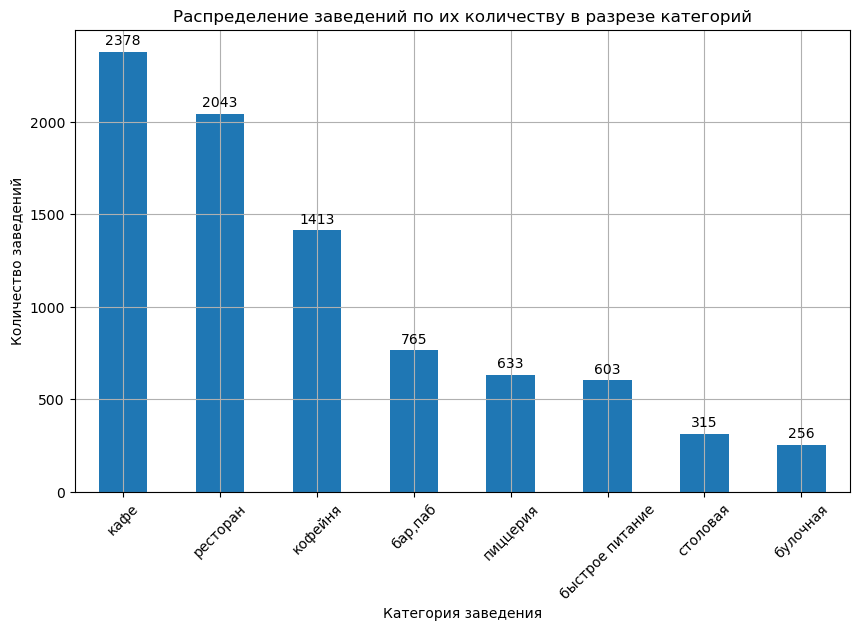

In [46]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(10, 6))
# Строим столбчатую диаграмму 
ax = df_category.plot(
               kind='bar', 
               rot=45, 
               legend=False, 
               title=f'Распределение заведений по их количеству в разрезе категорий'
)
# Добавляем значения на столбцы
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Рассмотрим распределение долей заведений в разверезе категорий

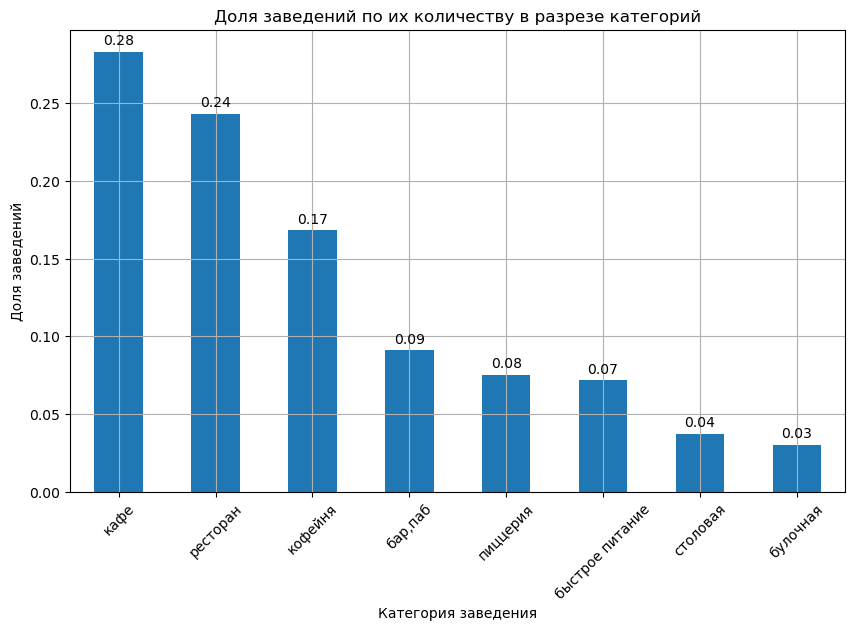

In [48]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(10, 6))

# Создаем значения для меток
df['category'].value_counts(normalize = True)

# Строим столбчатую диаграмму
ax = df['category'].value_counts(normalize = True).plot(
               kind='bar',
               rot=45, 
               legend=False, 
               title=f'Доля заведений по их количеству в разрезе категорий'
)
# Добавляем значения на столбцы
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)
# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

Из графиков можно сделать вывод, что по количеству заведений лидирующие позиции занимают категории: кафе, ресторан. Меньше всего в Москве - столовых и булочных.

### Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [51]:
# Проверяем распределение данных по значениям столбца 'category'
df_categories_by_district = df['district'].value_counts()
df_categories_by_district.sort_values(ascending = False)

district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

Для визуального анализа распределения данных будем использовать линейчатую диаграмму.

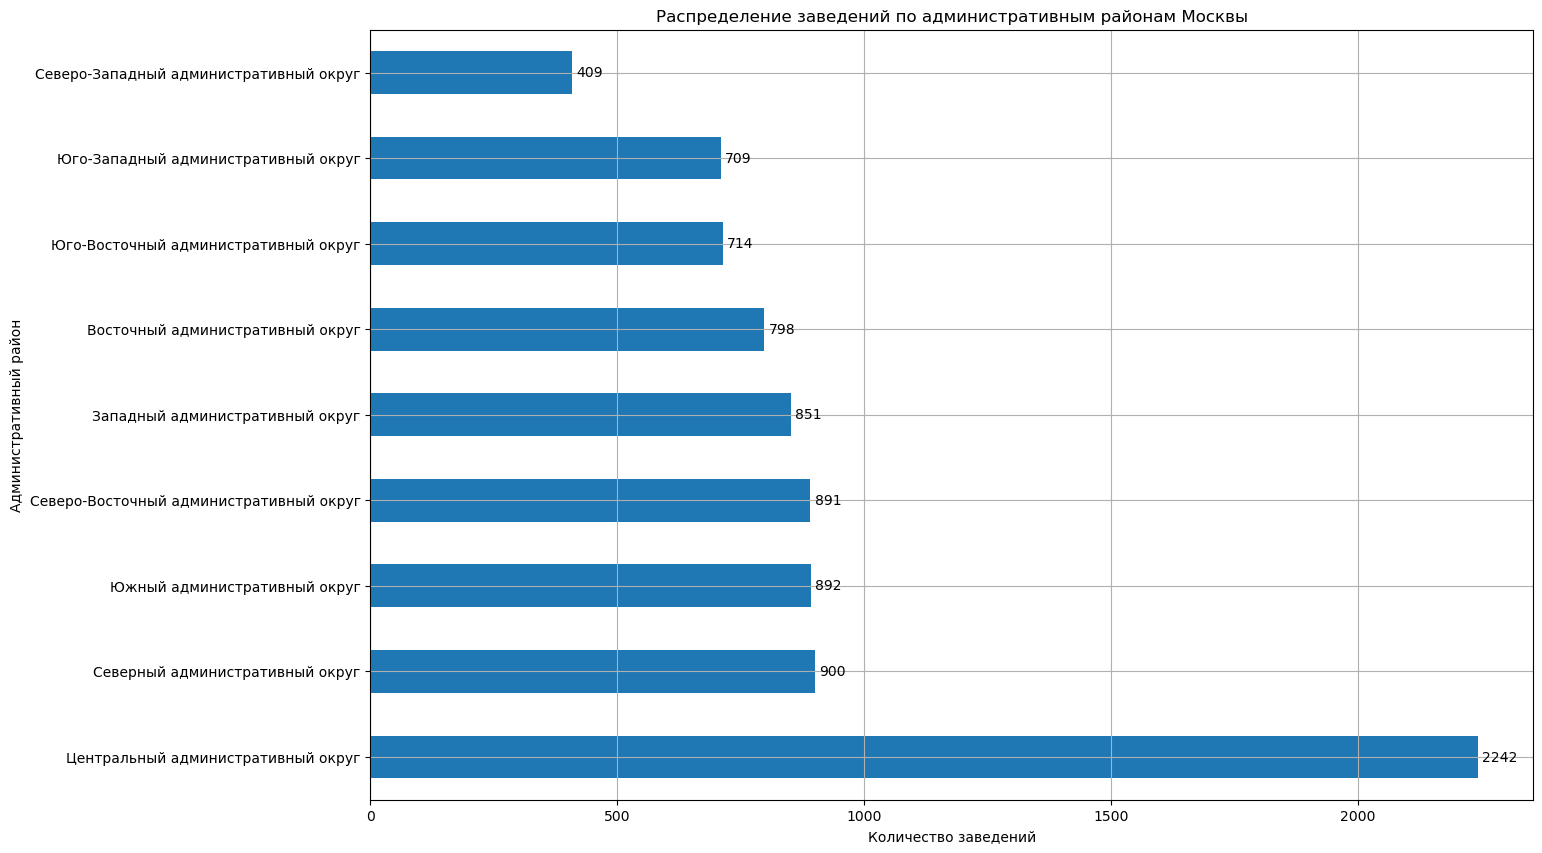

In [53]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(15, 10))
# Строим линейчатую диаграмму )
ax = df_categories_by_district.plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Распределение заведений по административным районам Москвы'
)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3) 
# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

В диграмме по распределению заведений по административным районам Москвы явно выделяется ЦАО (Центральный административный округ), в нем располагается 2242 заведений. Меньше всего заведений в СЗАО (Северо-западный административный округ) и в ЮЗАО (Юго-западный административный округ).

Создадим новый датафрейм и назначим административный район - центральный

In [56]:
df_cao = df[df['district'] == 'Центральный административный округ']

Проверяем распределение категорий заведений в центральном районе

In [58]:
df_cao_category = df_cao['category'].value_counts()
df_cao_category.sort_values(ascending = False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

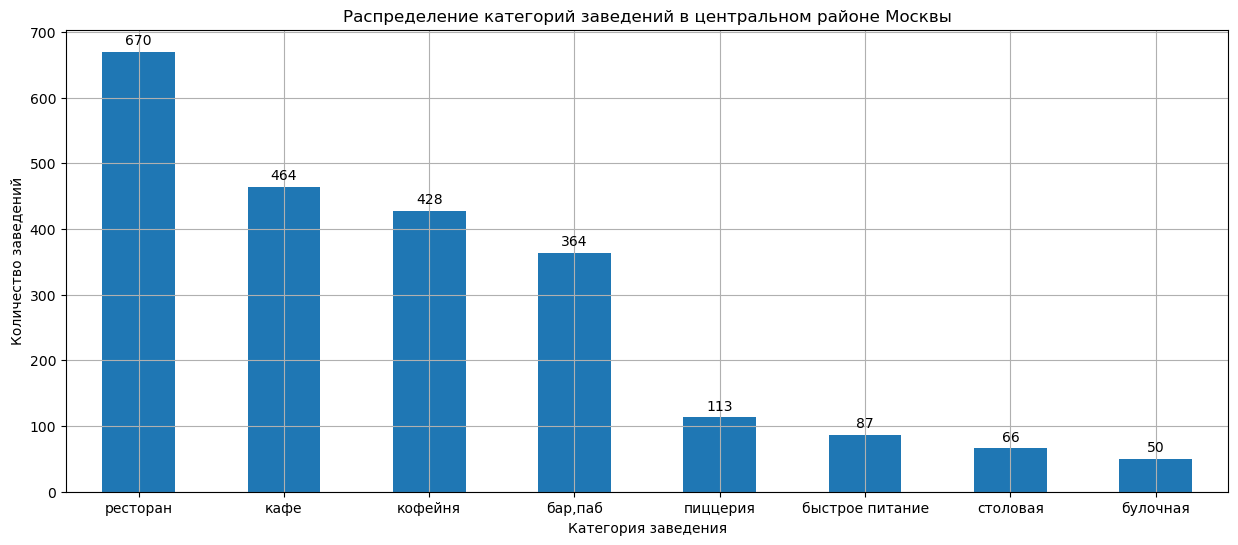

In [59]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(15, 6))
ax = df_cao_category.plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Распределение категорий заведений в центральном районе Москвы'
)
ax.bar_label(ax.containers[0], fmt = '%d', padding = 3)
# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

В ЦАО располагается больше ресторанов, чем кафе.
Из графика распределение заведений по их количеству в разрезе категорий (в задаче 1) количество всех ресторанов по Москве составило 2043, в ЦАО из них 670, что составляет 33% от всех ресторанов.

### Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 
Ответим на вопросы: 
- Каких заведений больше — сетевых или несетевых?
- Какие категории заведений чаще являются сетевыми? 

При исследовании данных по бинарному признаку можно использовать метод value_counts() с аргументом normalize=True, чтобы сравнить доли значений. 

In [63]:
# Проверяем распределение данных по значениям в столбце 'chain'
df['chain'].value_counts(normalize=True)

chain
0    0.618725
1    0.381275
Name: proportion, dtype: float64

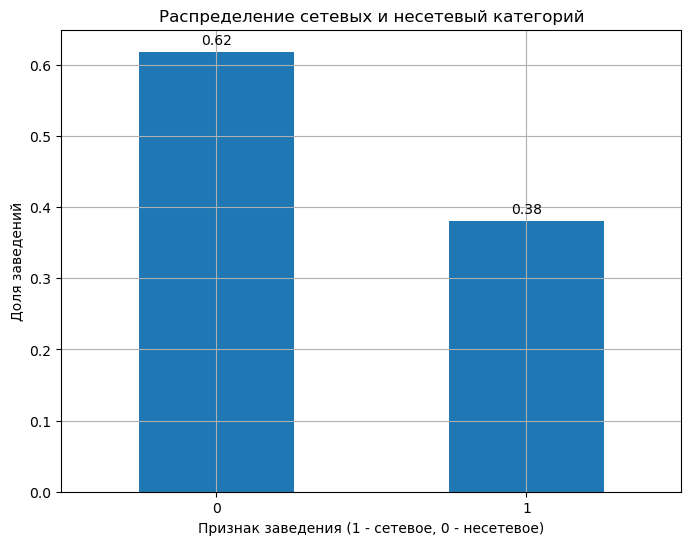

In [64]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(8, 6))
ax = df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевый категорий'
)
ax.bar_label(ax.containers[0], fmt = '%.2f', padding = 3)
# Настраиваем оформление графика
plt.xlabel('Признак заведения (1 - сетевое, 0 - несетевое)')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Изучив распределение сетевых и несетевых заведений, можно сказать, что доля несетевых заведений больше и составляет 62% от всех заведений.

Изучим распределение сетевых и несетевый заведений в разрезе категорий.

chain               0    1
category                  
бар,паб           596  169
булочная           99  157
быстрое питание   371  232
кафе             1599  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  730
столовая          227   88


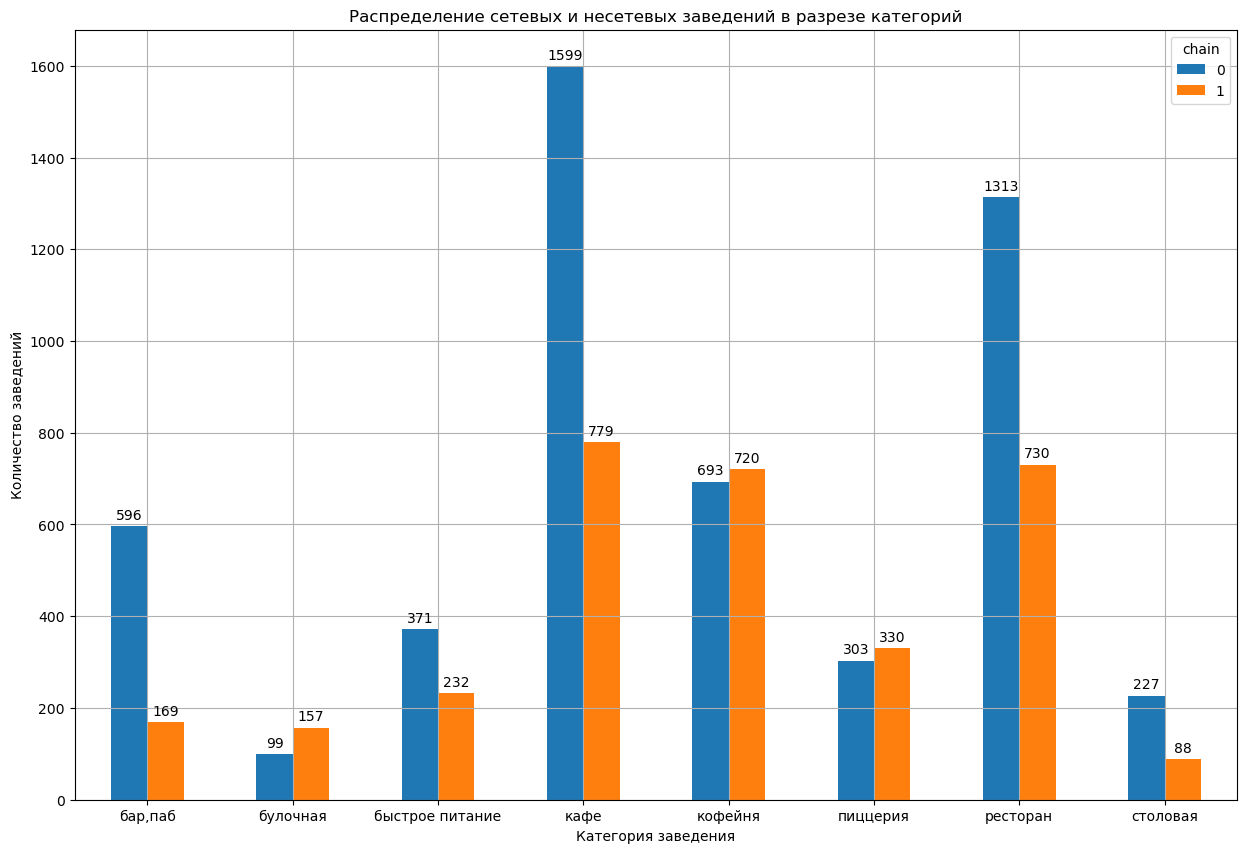

In [67]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
print(grouped)
ax = grouped.plot(kind='bar',
               title=f'Распределение сетевых и несетевых заведений в разрезе категорий',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведения',
               rot=0,
               figsize=(15, 10))
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.grid()
# Выводим график
plt.show()

В соотношении сетевые/несетевые заведения преобладают категории: булочная, кофейня, пиццерия. 
Большая часть несетевых заведений в категориях: кафе (1599 заведений, что составляет 63% от всех кафе), ресторан (1313 заведений, что составляет 64% от всех ресторанов).

### Исследуем количество посадочных мест в заведениях. 

In [70]:
# Изучаем статистические паказатели столбца 'seats'
df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Исследуя статистические показатели, видим, что среднее (108 посадочных мест) и медиана (75 посадочных мест) сильно отличаются, что говорит о выбросах. Также об этом говорит максимальное и минимальное значения посадочных мест, которые составляют 1288 и 0 посадочных мест соответственно.

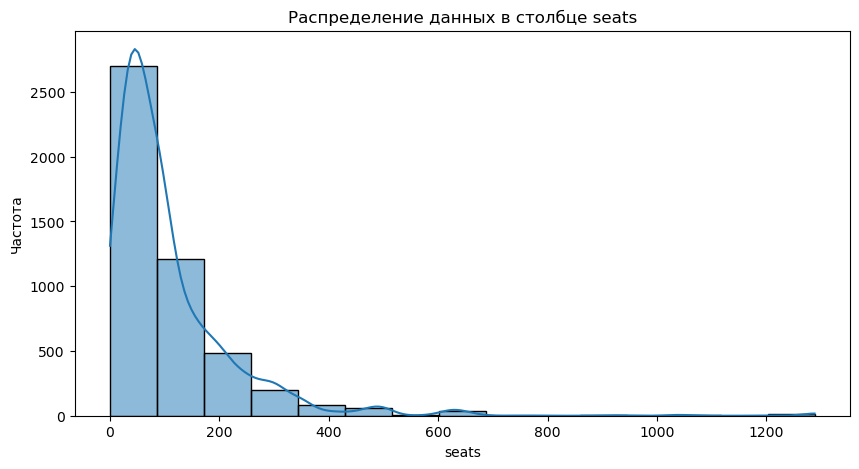

In [72]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Построим распределение данных в столбце `seats`
sns.histplot(data=df, x='seats', bins=15, kde=True)

# Подписываем и отображаем график
plt.title('Распределение данных в столбце seats')
plt.ylabel('Частота')
plt.show()

Гистограмма имеет правоасимметричное распределение. Правый «хвост» такого распределения будет длиннее левого.
Это указывает на присутствие высоких значений, которые оттягивают распределение вправо. Среднее значение превышает медиану — это также подтверждает наличие положительных выбросов, которые оказывают влияние на центральные показатели. Мода распределения равна близка к 0 — значит, большинство значений сосредоточено около нуля. Это может говорить о том, что низкие значения часто встречаются в данных, а редкие высокие значения формируют правосторонний хвост.

Строим диаграмму размаха

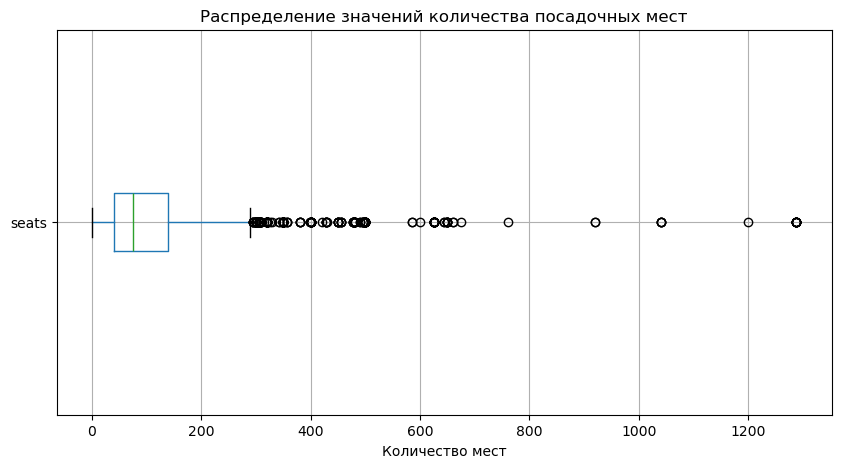

In [75]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество мест')

# Выводим график
plt.show()

Рассмотрим распределение количества посадочных мест в разрезе категорий

In [77]:
df.groupby('category')['seats'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",468.0,124.532051,145.011574,0.0,48.00,82.5,150.0,1288.0
булочная,148.0,89.385135,97.685844,0.0,25.00,50.0,120.0,625.0
быстрое питание,349.0,98.891117,106.611739,0.0,28.00,65.0,140.0,1040.0
кафе,1218.0,97.512315,117.985084,0.0,35.25,60.0,120.0,1288.0
кофейня,751.0,111.199734,127.837772,0.0,40.00,80.0,144.0,1288.0
пиццерия,427.0,94.496487,112.282703,0.0,30.00,55.0,120.0,1288.0
ресторан,1270.0,121.944094,123.757335,0.0,48.00,86.0,150.0,1288.0
столовая,164.0,99.750000,122.951453,0.0,40.00,75.5,117.0,1200.0


Построим график распределения количества посадочных мест в разрезе категорий заведения. 

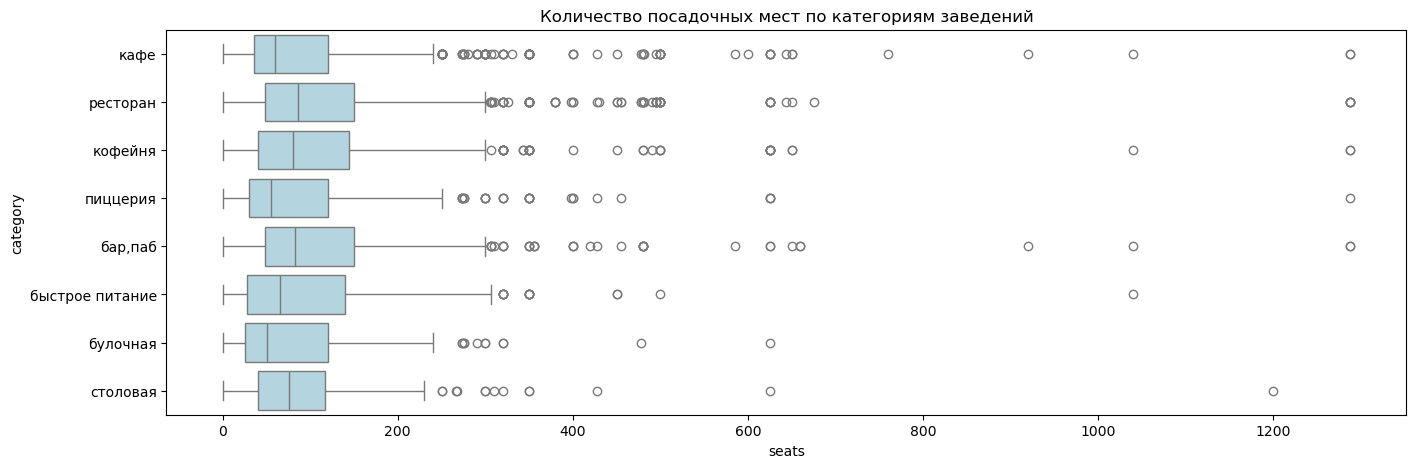

In [79]:
plt.figure(figsize=(16, 5))
sns.boxplot(y = 'category', x = 'seats', data = df, color = 'lightblue')
plt.title('Количество посадочных мест по категориям заведений')
plt.show()

На диаграмме размаха видим, что в данных присутствуют выбросы, и все категории имеют много значений, равных нулю, что показывает смещение диаграммы вправо. Медианное значение варьируется от 50 до 86 посадочных мест. 

### Исследуем рейтинг заведений

In [82]:
# Находим средний рейтинг в разрезе категорий заведения
df_rating = df.groupby('category')['rating'].mean()
df_rating = df_rating.sort_values(ascending=False)

In [83]:
df_rating.head()

category
бар,паб     4.387712
пиццерия    4.301264
ресторан    4.290357
кофейня     4.277282
булочная    4.268359
Name: rating, dtype: float64

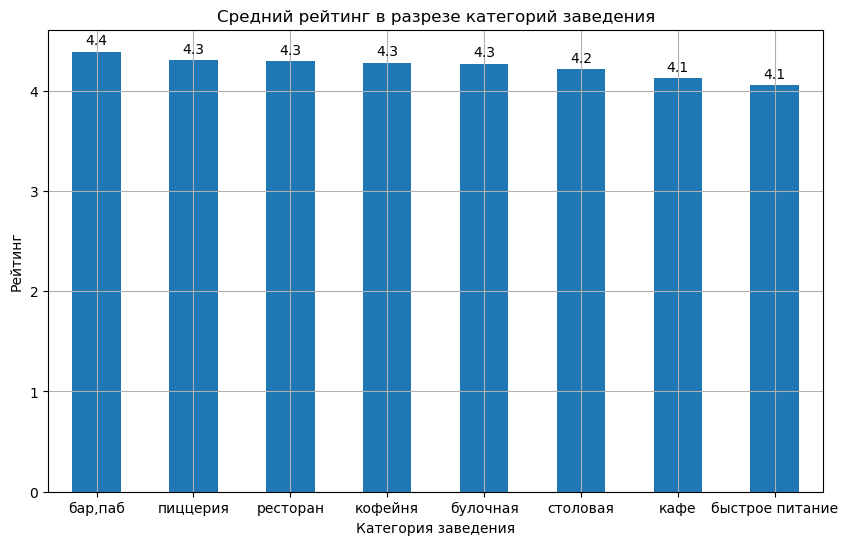

In [84]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(10, 6))
ax = df_rating.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг в разрезе категорий заведения'
)
ax.bar_label(ax.containers[0], fmt = '%.1f', padding = 3)
# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Средний рейтинг в разрезе категорий заведения примерно одикановый, и равен приблизительно 4.3

### Изучим с какими данными показывают самую сильную корреляцию рейтинги заведений

In [87]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()
print('Корреляционная матрица с коэффициентом phi_k для переменной churn')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной churn


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


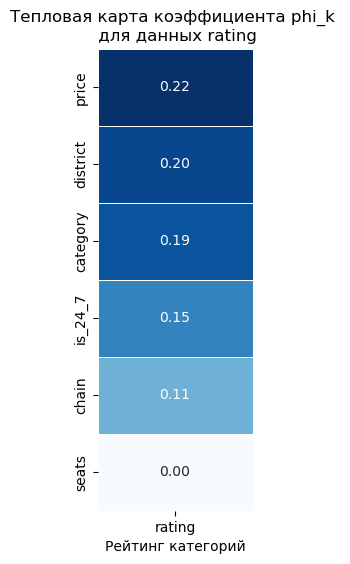

In [88]:
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='Blues', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг категорий')

# Выводим график
plt.show()

Самую большую связь рейтинг имеет с ценовой категорией  и составляет 0.22. С количеством посадочных мест рейтинг никакую связь не имеет.

Находим признак с наибольшей корреляцией с рейтингом (исключая сам рейтинг)

In [91]:
rating_corr = correlation_matrix['rating'].drop('rating')
most_correlated_feature = rating_corr.abs().idxmax()
correlation_value = rating_corr[most_correlated_feature]
f'Признак с наибольшей корреляцией с рейтингом: {most_correlated_feature}(phik = {correlation_value: .2f})'

'Признак с наибольшей корреляцией с рейтингом: price(phik =  0.22)'

### Топ-15 популярных сетей в Москве

In [93]:
# Фильтруем данные, выбрав только сетевые заведения и исключив 'яндекс_лавку' (в данных представлена как сетевое заведение)
top_15 = df[(df['chain'] == 1) & (df['name'] != 'яндекс лавка')]

# Проводим группировку и агрегацию
top_15 = top_15.groupby(['name', 'category']).agg(mean_rating = ('rating', 'mean'), count = ('name', 'count'))

# Сортируем данные
top_15 = top_15.sort_values(by = 'count', ascending = False).head(15)
top_15 = top_15.reset_index()

display(top_15)

,name,category,mean_rating,count
0,шоколадница,кофейня,4.178151,119
1,домино'с пицца,пиццерия,4.169737,76
2,додо пицца,пиццерия,4.286486,74
3,one price coffee,кофейня,4.064789,71
4,cofix,кофейня,4.075385,65
5,prime,ресторан,4.114286,49
6,кофепорт,кофейня,4.147619,42
7,кулинарная лавка братьев караваевых,кафе,4.394872,39
8,теремок,ресторан,4.105556,36
9,cofefest,кофейня,3.977419,31


<Figure size 1800x1000 with 0 Axes>

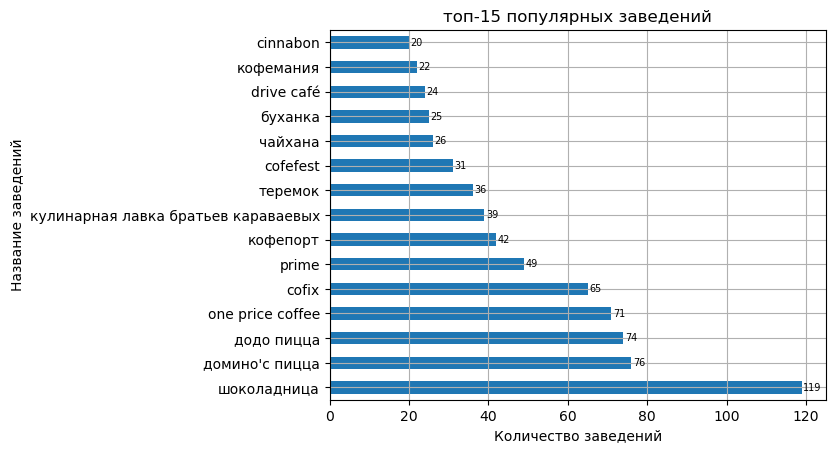

In [94]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(18, 10))
# Строим линейчатую диаграмму 
ax = top_15.plot(
               kind='barh',
               x = 'name',
               y = 'count',
               rot=0, 
               legend=False, 
               title=f'топ-15 популярных заведений'
)
# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Название заведений')
ax.bar_label(ax.containers[0], fmt = '%d', padding = 1, fontsize=7)
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

<Figure size 1500x1000 with 0 Axes>

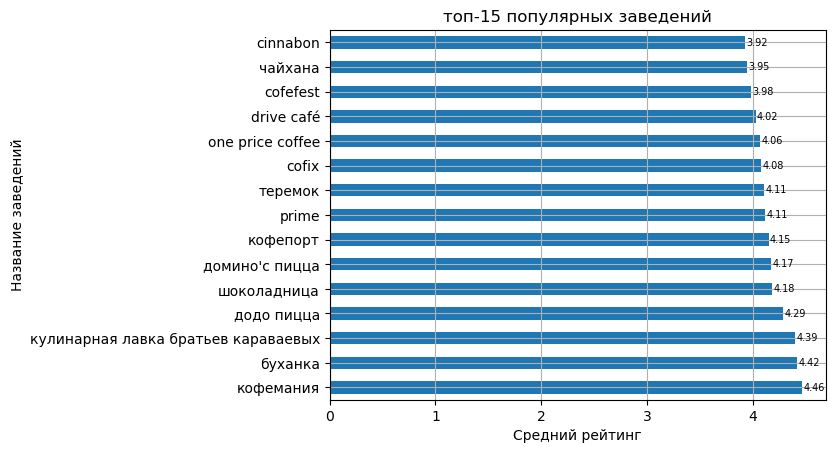

In [95]:
top_15 = top_15.sort_values(by = 'mean_rating', ascending = False)
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(15, 10))
# Строим столбчатую диаграмму 
ax = top_15.plot(
               kind='barh',
               x = 'name',
               y = 'mean_rating',
               rot=0, 
               legend=False,
               title=f'топ-15 популярных заведений'
)
# Настраиваем оформление графика
plt.xlabel('Средний рейтинг')
plt.ylabel('Название заведений')
ax.bar_label(ax.containers[0], fmt = '%.2f', padding = 1, fontsize=7)
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

Из графиков можно сделать выводы: 
- количество сетей кофемании меньше всего (22 заведения), при этом средний рейтинг у этой сети самый большой (приблизительно 4.46). 
- В топ-15 вошли 7 кофеен, можно говорить о том, что кофейни очень популярны в Москве.
- Самая большая сеть в Москве - Шоколадница, количество заведений этой сети составляет 119.

### Изучим вариацию среднего чека заведения в зависимости от района Москвы

Группируем данные по административным округам и выводим среднее значение чека 

In [99]:
df_district = df.groupby('district')['middle_avg_bill'].mean()
df_district = df_district.sort_values(ascending = False)
print(df_district)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64


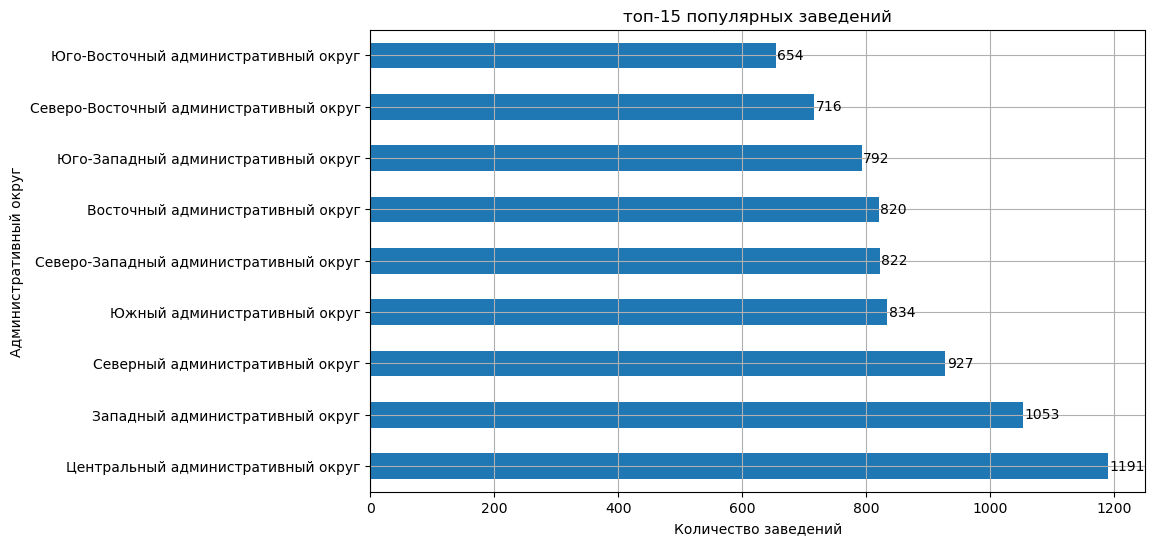

In [100]:
# Создаем контейнер графика и задаем его размер
plt.figure(figsize=(10, 6))
# Строим линейчатую диаграмму 
ax = df_district.plot(
               kind='barh', 
               x = 'name',
               y = 'mean_rating',
               rot=0, 
               legend=False, 
               title=f'топ-15 популярных заведений'
)
# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный округ')
ax.bar_label(ax.containers[0], fmt = '%d', padding = 1)
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Значение среднего чека в Центальном-административном округе самое большое и составляет приблизительно 1191. Чем дальше от центра, тем значение среднего чека меньше.

### Найдем взаимосвязь часов работы заведений или стоимостью чашки кофе в зависимости от расположения или типа заведения

Проанализируем распределение круглосуточных и некруглосуточных заведений в разрезе административного округа

is_24_7                                     0    1
district                                          
Восточный административный округ          701   97
Западный административный округ           779   72
Северный административный округ           829   71
Северо-Восточный административный округ   816   75
Северо-Западный административный округ    366   43
Центральный административный округ       2111  131
Юго-Восточный административный округ      621   93
Юго-Западный административный округ       636   73
Южный административный округ              817   75


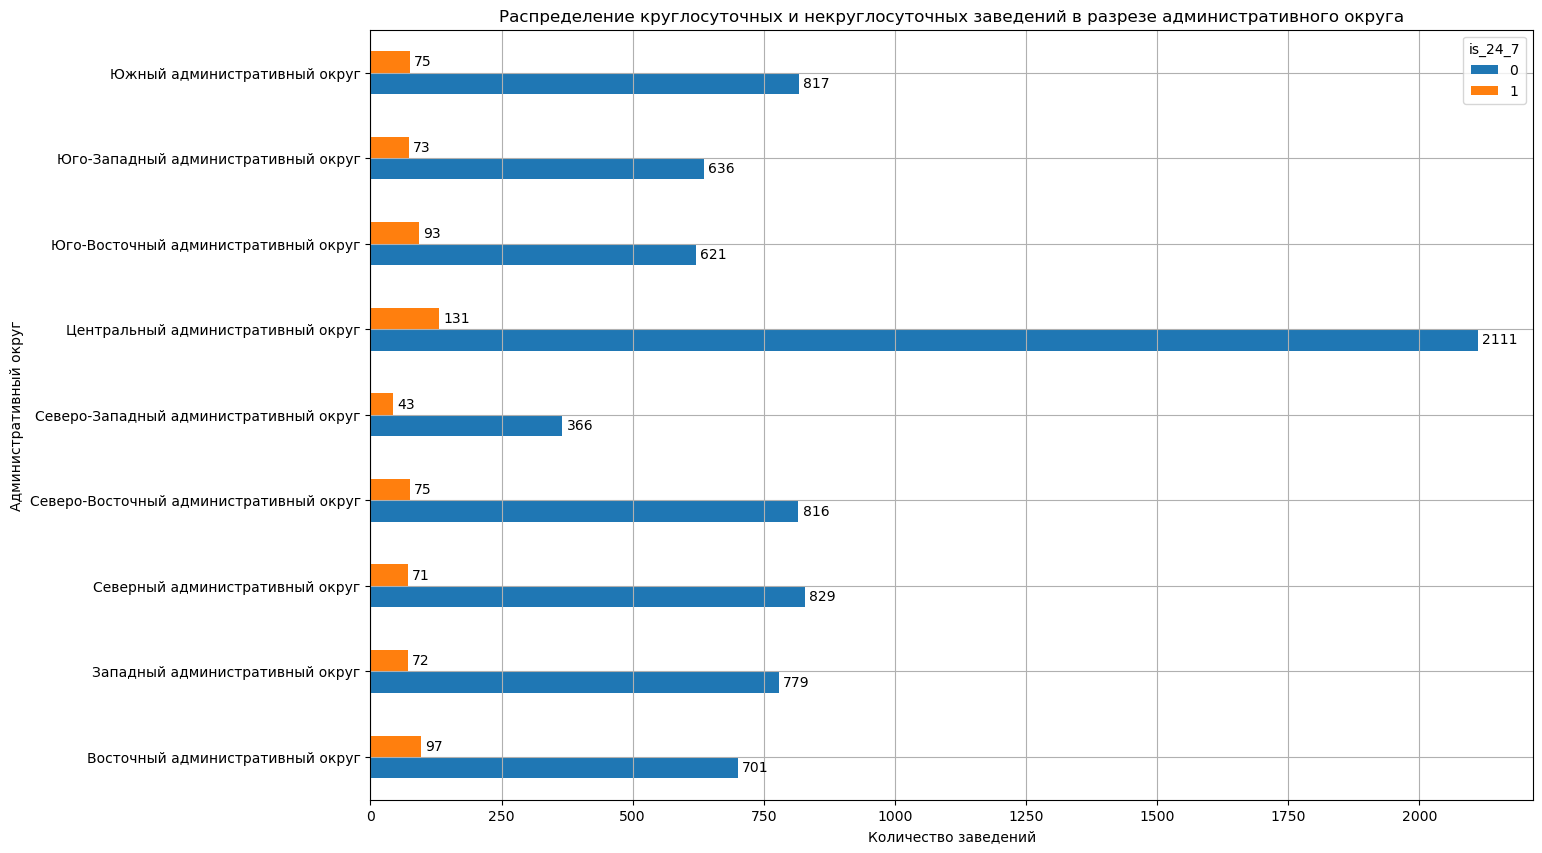

In [104]:
# Построим график линейчатой диаграммы
is_24_7_in_district = df.groupby('district')['is_24_7'].value_counts().unstack(fill_value=0)
print(is_24_7_in_district)
ax = is_24_7_in_district.plot(kind='barh',
               title=f'Распределение круглосуточных и некруглосуточных заведений в разрезе административного округа',
               legend=True,
               ylabel='Административный округ',
               xlabel='Количество заведений',
               rot=0,
               figsize=(15, 10))
for container in ax.containers:
    ax.bar_label(container, fmt = '%d', padding = 3)
plt.grid()
# Выводим график
plt.show()

Наибольшее количество круглосуточных заведений располагается в ЦАО - 131 заведение, меньше всего в СЗАО - 43 заведения.

Проанализируем распределение круглосуточных и некруглосуточных заведений в разрезе категорий

is_24_7             0    1
category                  
бар,паб           713   52
булочная          232   24
быстрое питание   453  150
кафе             2111  267
кофейня          1354   59
пиццерия          602   31
ресторан         1908  135
столовая          303   12


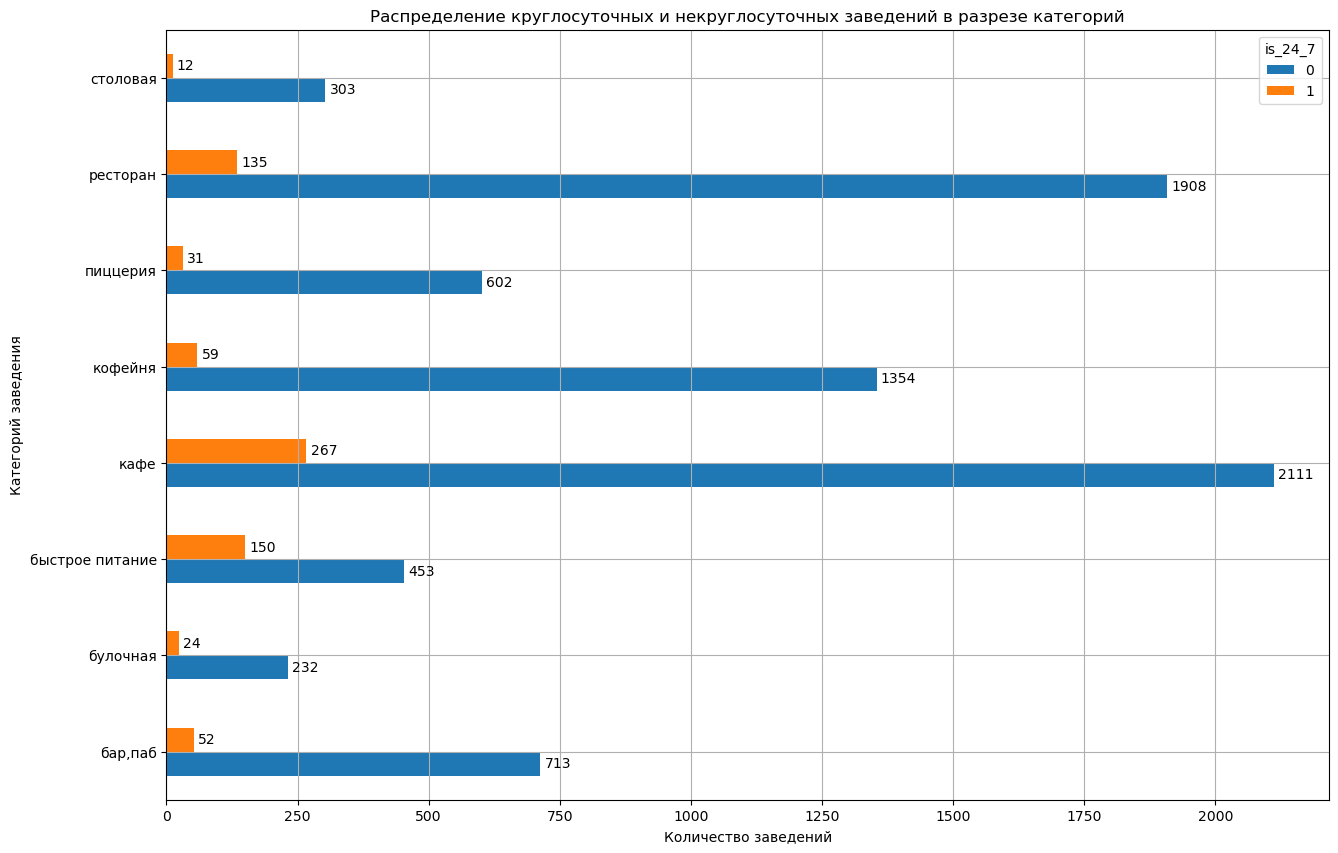

In [107]:
# Построим график линейчатой диаграммы
is_24_7_in_district = df.groupby('category')['is_24_7'].value_counts().unstack(fill_value=0)
print(is_24_7_in_district)
ax = is_24_7_in_district.plot(kind='barh',
               title=f'Распределение круглосуточных и некруглосуточных заведений в разрезе категорий',
               legend=True,
               ylabel='Категорий заведения',
               xlabel='Количество заведений',
               rot=0,
               figsize=(15, 10))
for container in ax.containers:
    ax.bar_label(container, fmt = '%d', padding = 3)
plt.grid()
# Выводим график
plt.show()

На графике видно, что большинство круглосуточных заведений - это кафе, рестораны и быстрое питание.
Доля круглосуточных заведений быстрого питания относительно количества заведений этой категории составляет 25%.

### 4. Итоговый вывод и рекомендации

После объединения двух датасетов в один, были обнаружены пропуски.
536 пропусков в столбце 'hours' (6% от всех данных), 3611 пропусков в столце 'seats' (43%), 5091 пропусков в столбце 'price' (60%), 4590 пропусков в столце 'avg_bill' (55%), 5257 пропусков в столбце 'middle_avg_bill' (63%), 7871 пропусков в столбце 'middle_coffee_cup' (94%).

В столбце 'hours' значение пропусков составляет 6%, их не так много, поэтому оставим эти пропуски. В остальных столбцах количество пропусков имеют большое значение, однако, если бы мы их удалили, либо заменим пропуски индикатором или средним значением, данные сильно исказятся, поэтому пропуски в этих столбцах тоже оставим. 

После проведения нормализации выявили по наименованию и адресу заведения 4 дубликата, так как их очень мало, мы их удалили.

**Выводы по исследовательскому анализу:**
- Лидирующие позиции по количеству заведений в разрезе категорий заняли: кафе и рестораны.
- Наибольшее количество заведений сосредоточено в ЦАО (2242 заведения). Меньше всего в СЗАО (409 заведений).
- В ЦАО располагается больше ресторанов и кафе. При этом в ЦАО 33% ресторанов от всего количества ресторанов по Москве.
- Несетевых заведений в Москве больше, доля таких заведений составляет 62%.
- Большая часть несетевых заведений - это кафе и рестораны, их доля составляет приблизительно 63%.
- В соотношении сетевые/несетевые заведения преобладают категории булочная, пиццерия и кофейня.
- Исследуя гистограмму распределения количества посадочных мест, можно сказать, что она имеет правоасиммтричное распредение. Это говорит о том, что в данных присутствуют высокие значения, среднее значение будет превышать медиану, а также показывает наличие выбросов.
- Средний рейтинг в разрезе категорий приблизительно одинаковый и составляет 4.3.
- Самую сильную связь рейтинг показал с категорией цен в заведении (0.22). Количество посадочных мест никак не влияет на рейтинг заведения.
- В топ-15 сетей вошли 7 кофеен. Это говорит о том, что кофейни очень популярны в Москве.
- Значение среднего чека зависит от расположения заведения. Чем дальше от центра, тем меньше средний чек.

На основе исследовательского анализа можно дать некоторые рекомендации:
- Можно купить франшизу популярной кофейни в центре Москвы или в ЗАО, так как кофейни очень популярны и расположение в центре повлияет на средний чек. 
- Большое количество ресторанов в центре, скорее всего, говорит о том, что на них есть спрос, можно также рассмотреть вариант открытия ресторана. 